In [5]:

# Basic Tools
import numpy as np
import pandas as pd
from datetime import datetime as dt
import sys
import re


# Visualization Tools
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from PIL import Image
from IPython.display import display
import sweetviz as sv

# import plotly packages 
import plotly.graph_objects as go
import plotly.express as px



#!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport



from sklearn.model_selection import train_test_split



import warnings

import warnings
warnings.filterwarnings( 'ignore' )

# Configurations

In [33]:
def pandas_settings():
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option('display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 35)
    pd.set_option('display.max_rows', 50)
    

pandas_settings()

In [68]:
data_raw = pd.read_csv('../data/processed/data_processed.csv')

In [69]:
data = data_raw.copy()

# change type

In [70]:
map_type = {'PAYMENT': 0,'TRANSFER':1,'CASH_OUT': 2,'DEBIT': 3,'CASH_IN': 4}
data['type'] = data['type'].map(map_type)

map_type_dest = {'C': 0,'M':1}
data['type_dest'] = data['type_dest'].map(map_type_dest)

# Analyse Dataset

In [71]:
# profile = ProfileReport(data, minimal=True)
# profile.to_file(output_file="../reports/analyse_fraud.html")

In [72]:

# my_report = sv.analyze(data)
# my_report.show_html() 

In [73]:
data.dtypes

step                  int64
type                  int64
amount              float64
name_orig             int64
oldbalance_org      float64
newbalance_orig     float64
name_dest             int64
oldbalance_dest     float64
newbalance_dest     float64
is_fraud              int64
is_flagged_fraud      int64
length_name_orig      int64
length_name_dest      int64
type_dest             int64
dia                   int64
hora                  int64
origin_missing      float64
dest_missing        float64
dtype: object

In [74]:
data.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud,length_name_orig,length_name_dest,type_dest,dia,hora,origin_missing,dest_missing
0,1,0,"9,839.64",1231006815,"170,136.00","160,296.36",1979787155,0.00,0.00,0,0,11,11,1,1,0,0.00,"9,839.64"
1,1,0,"1,864.28",1666544295,"21,249.00","19,384.72",2044282225,0.00,0.00,0,0,11,11,1,1,0,0.00,"1,864.28"
2,1,1,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0,11,10,0,1,0,0.00,181.00
3,1,2,181.00,840083671,181.00,0.00,38997010,"21,182.00",0.00,1,0,10,9,0,1,0,0.00,"-21,001.00"
4,1,0,"11,668.14",2048537720,"41,554.00","29,885.86",1230701703,0.00,0.00,0,0,11,11,1,1,0,0.00,"11,668.14"


In [75]:
teste = data.copy()

In [76]:
teste['name_orig'] = teste['name_orig'].astype(str)  # Convert integers to strings
teste['LENGTH_name_orig'] = teste['name_orig'].str.len()


In [77]:
teste['name_dest'] = teste['name_dest'].astype(str)  # Convert integers to strings
teste['LENGTH_name_dest'] = teste['name_dest'].str.len()


In [78]:
teste['LENGTH_name_orig'].unique()

array([10,  9,  8,  7,  6,  5,  4], dtype=int64)

In [66]:
teste['LENGTH_name_dest'].unique()

array([10,  9,  8,  7,  6,  3,  5,  4,  1], dtype=int64)

In [23]:
data.dtypes

step                  int64
type                  int64
amount              float64
name_orig             int64
oldbalance_org      float64
newbalance_orig     float64
name_dest             int64
oldbalance_dest     float64
newbalance_dest     float64
is_fraud              int64
is_flagged_fraud      int64
type_dest             int64
dia                   int64
hora                  int64
origin_missing      float64
dest_missing        float64
dtype: object

In [22]:
desc = data.describe()
desc = desc.style.background_gradient()
desc

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud,type_dest,dia,hora,origin_missing,dest_missing
count,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000
mean,243.397246,1.686309,179861.903549,1073759036.726486,833883.104074,855113.668579,1073432221.407277,1100701.666520,1224996.398202,0.001291,0.000003,0.338146,10.491907,14.591483,201092.468053,304156.635231
std,142.331971,1.491355,603858.231463,620078300.686025,2888242.673038,2924048.502954,620492725.396405,3399180.112994,3674128.942120,0.035905,0.001586,0.473079,5.921812,4.100153,606650.460140,1362380.920588
min,1.000000,0.000000,0.000000,1338.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.010000,-12930418.440000
25%,156.000000,0.000000,13389.570000,537017706.000000,0.000000,0.000000,536091873.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000,2954.230000,3815.940000
50%,239.000000,2.000000,74871.940000,1073741161.000000,14208.000000,0.000000,1072209263.000000,132705.665000,214661.440000,0.000000,0.000000,0.000000,10.000000,15.000000,68677.255000,27748.415000
75%,335.000000,2.000000,208721.477500,1610813625.750000,107315.175000,144258.410000,1611937607.000000,943036.707500,1111909.250000,0.000000,0.000000,1.000000,14.000000,18.000000,249641.087500,308391.692500
max,743.000000,4.000000,92445516.640000,2147483560.000000,59585040.370000,49585040.370000,2147483045.000000,356015889.350000,356179278.920000,1.000000,1.000000,1.000000,31.000000,23.000000,92445516.640000,184891033.280000


In [250]:
# def remove_1_letra(df, column_name):
#     df[column_name] = df[column_name].str[1:]




In [251]:
# remove_1_letra(data, 'name_orig')
# remove_1_letra(data, 'name_dest')

In [253]:
data.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,0,"9,839.64",1231006815,"170,136.00","160,296.36",1979787155,0.00,0.00,0,0
1,1,0,"1,864.28",1666544295,"21,249.00","19,384.72",2044282225,0.00,0.00,0,0
2,1,1,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0
3,1,2,181.00,840083671,181.00,0.00,38997010,"21,182.00",0.00,1,0
4,1,0,"11,668.14",2048537720,"41,554.00","29,885.86",1230701703,0.00,0.00,0,0


In [ ]:
# s.str.slice(start=0, stop=5, step=3)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html
# mostrar valores unico da inicial
data['name_orig'].str[0:1].unique()

In [24]:
data[data['amount'] < 0.10]

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud,type_dest,dia,hora,origin_missing,dest_missing
1673434,158,0,0.06,1836545979,0.00,0.00,711077292,0.00,0.00,0,0,1,7,13,0.06,0.06
2359430,190,0,0.02,344473063,"33,192.97","33,192.95",646412904,0.00,0.00,0,0,1,8,21,0.00,0.02
2359953,190,0,0.07,1814144923,"11,788.13","11,788.06",28752575,0.00,0.00,0,0,1,8,21,0.00,0.07
2736447,212,2,0.00,1510987794,0.00,0.00,1696624817,0.00,0.00,1,0,0,9,19,0.00,0.00
2799608,217,0,0.03,807337950,"205,196.00","205,195.97",1035971031,0.00,0.00,0,0,1,10,0,0.00,0.03
3027913,233,0,0.02,1371059152,0.00,0.00,1506318282,0.00,0.00,0,0,1,10,16,0.02,0.02
3247298,250,2,0.00,521393327,0.00,0.00,480398193,0.00,0.00,1,0,0,11,9,0.00,0.00
3760289,279,2,0.00,539112012,0.00,0.00,1106468520,"538,547.63","538,547.63",1,0,0,12,14,0.00,0.00
4077303,301,0,0.02,421116740,0.00,0.00,410442874,0.00,0.00,0,0,1,13,12,0.02,0.02
4736180,332,2,0.01,1496340830,0.00,0.00,554562342,"262,792.79","262,792.80",0,0,0,14,19,0.01,0.02


In [25]:
df2 =data.groupby(['type']).sum()
df2 

,step,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud,type_dest,dia,hora,origin_missing,dest_missing
type,,,,,,,,,,,,,,,
0,525778430,"28,093,371,138.37",2310624622185633,"146,768,163,438.80","133,043,913,105.10",2311089737590313,0.00,0.00,0,0,2151495,22638850,31930415,"14,369,120,804.67","28,093,371,138.37"
1,131445897,"485,291,987,263.17",572336289873047,"29,012,552,760.76","5,482,651,300.55",571848518364852,"1,368,300,197,339.45","1,894,260,653,500.24",4097,16,0,5665995,7718924,"461,762,085,802.96","1,011,252,443,423.96"
2,539015395,"394,412,995,224.49",2402668649768071,"102,978,263,227.81","39,098,506,249.34",2402155977193687,"3,351,233,273,577.65","3,784,342,078,061.13",4116,0,0,23254938,32359383,"330,533,238,246.02","827,521,799,707.97"
3,10293386,"227,199,221.28",44327573802431,"2,844,196,471.80","2,699,777,564.12",44383454980716,"61,863,601,275.22","62,686,759,687.09",0,0,0,443129,611226,"82,780,313.60","1,050,357,633.15"
4,342111075,"236,367,391,912.46",1501963586627493,"5,024,078,139,747.24","5,260,438,481,752.39",1500363632440802,"2,221,949,365,238.93","2,052,897,091,879.10",0,0,0,14753104,20220111,"472,727,733,917.61","67,315,118,552.63"


# Filter

In [216]:
condicao1 = (data['oldbalance_org'] - data['newbalance_orig'] == data['amount'])
condicao2 = (data['newbalance_dest'] - data['oldbalance_dest'] == data['amount'])



dados_filtrados_cliente = data[condicao1]
is_fraud_cliente = dados_filtrados_correto['is_fraud'].sum()



dados_filtrados_destino = data[condicao2]
is_fraud_destino = dados_filtrados_errado['is_fraud'].sum()



dados_filtrados_merge = data[condicao1 & condicao2]
is_fraud_merge = dados_filtrados_merge['is_fraud'].sum()




print(f'Tamanho do dataset: {data.shape[0]}')

print('-------------------------------------------')

print('Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação -  cliente')
print(f'Quantidade de linhas: {dados_filtrados_cliente.shape[0]}')
print(f'Quantidade de fraude: {is_fraud_cliente}')



print('-------------------------------------------')

print('Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação - destino')
print(f'Quantidade de linhas: {dados_filtrados_destino.shape[0]}')
print(f'Quantidade de fraude: {is_fraud_destino}')

print('-------------------------------------------')


print(f'Quantidade de linhas do filtro com base as condições: \
      {dados_filtrados_errado.shape[0] + dados_filtrados_correto.shape[0] }')

print('-------------------------------------------')

print('Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação cliente e  destino')
print(f'Quantidade de linhas: {dados_filtrados_merge.shape[0]}')
print(f'Quantidade de fraude: {is_fraud_merge}')

print('-------------------------------------------')



Tamanho do dataset: 6362620
-------------------------------------------
Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação -  cliente
Quantidade de linhas: 440511
Quantidade de fraude: 8144
-------------------------------------------
Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação - destino
Quantidade de linhas: 760360
Quantidade de fraude: 2171
-------------------------------------------
Quantidade de linhas do filtro com base as condições:       1200871
-------------------------------------------
Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação cliente e  destino
Quantidade de linhas: 60035
Quantidade de fraude: 2161
-------------------------------------------


In [217]:
# check se tem linhas com somente letra na coluna name_orig.
data.loc[data['name_orig'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'name_orig'].unique()

array([], dtype=object)

In [218]:
# # identficacao: mostrar todas as linhas que tem letra e numero
# df_name_orig = data.loc[data['name_orig'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
# df_name_orig.head(20)

In [219]:
# s.str.slice(start=0, stop=5, step=3)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html
# mostrar valores unico da inicial
data['name_orig'].str[0:1].unique()

array(['C'], dtype=object)

In [220]:
# mostrar a letra inicial do name_dest
# M (Comerciantes).
data['name_dest'].str[0:1].unique()

array(['M', 'C'], dtype=object)

In [221]:
# não temos o mesmo name_orig idetico com name_dest
teste = data['name_orig'] == data['name_dest']
data[teste]

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud


In [222]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
cat_attributes = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [223]:
num_attributes

,step,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,0,"9,839.6400","170,136.0000","160,296.3600",0.0000,0.0000,0,0
1,1,0,"1,864.2800","21,249.0000","19,384.7200",0.0000,0.0000,0,0
2,1,1,181.0000,181.0000,0.0000,0.0000,0.0000,1,0
3,1,2,181.0000,181.0000,0.0000,"21,182.0000",0.0000,1,0
4,1,0,"11,668.1400","41,554.0000","29,885.8600",0.0000,0.0000,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,"339,682.1300","339,682.1300",0.0000,0.0000,"339,682.1300",1,0
6362616,743,1,"6,311,409.2800","6,311,409.2800",0.0000,0.0000,0.0000,1,0
6362617,743,2,"6,311,409.2800","6,311,409.2800",0.0000,"68,488.8400","6,379,898.1100",1,0
6362618,743,1,"850,002.5200","850,002.5200",0.0000,0.0000,0.0000,1,0


In [224]:
cat_attributes

,name_orig,name_dest
0,C1231006815,M1979787155
1,C1666544295,M2044282225
2,C1305486145,C553264065
3,C840083671,C38997010
4,C2048537720,M1230701703
...,...,...
6362615,C786484425,C776919290
6362616,C1529008245,C1881841831
6362617,C1162922333,C1365125890
6362618,C1685995037,C2080388513


# Numerical Variables

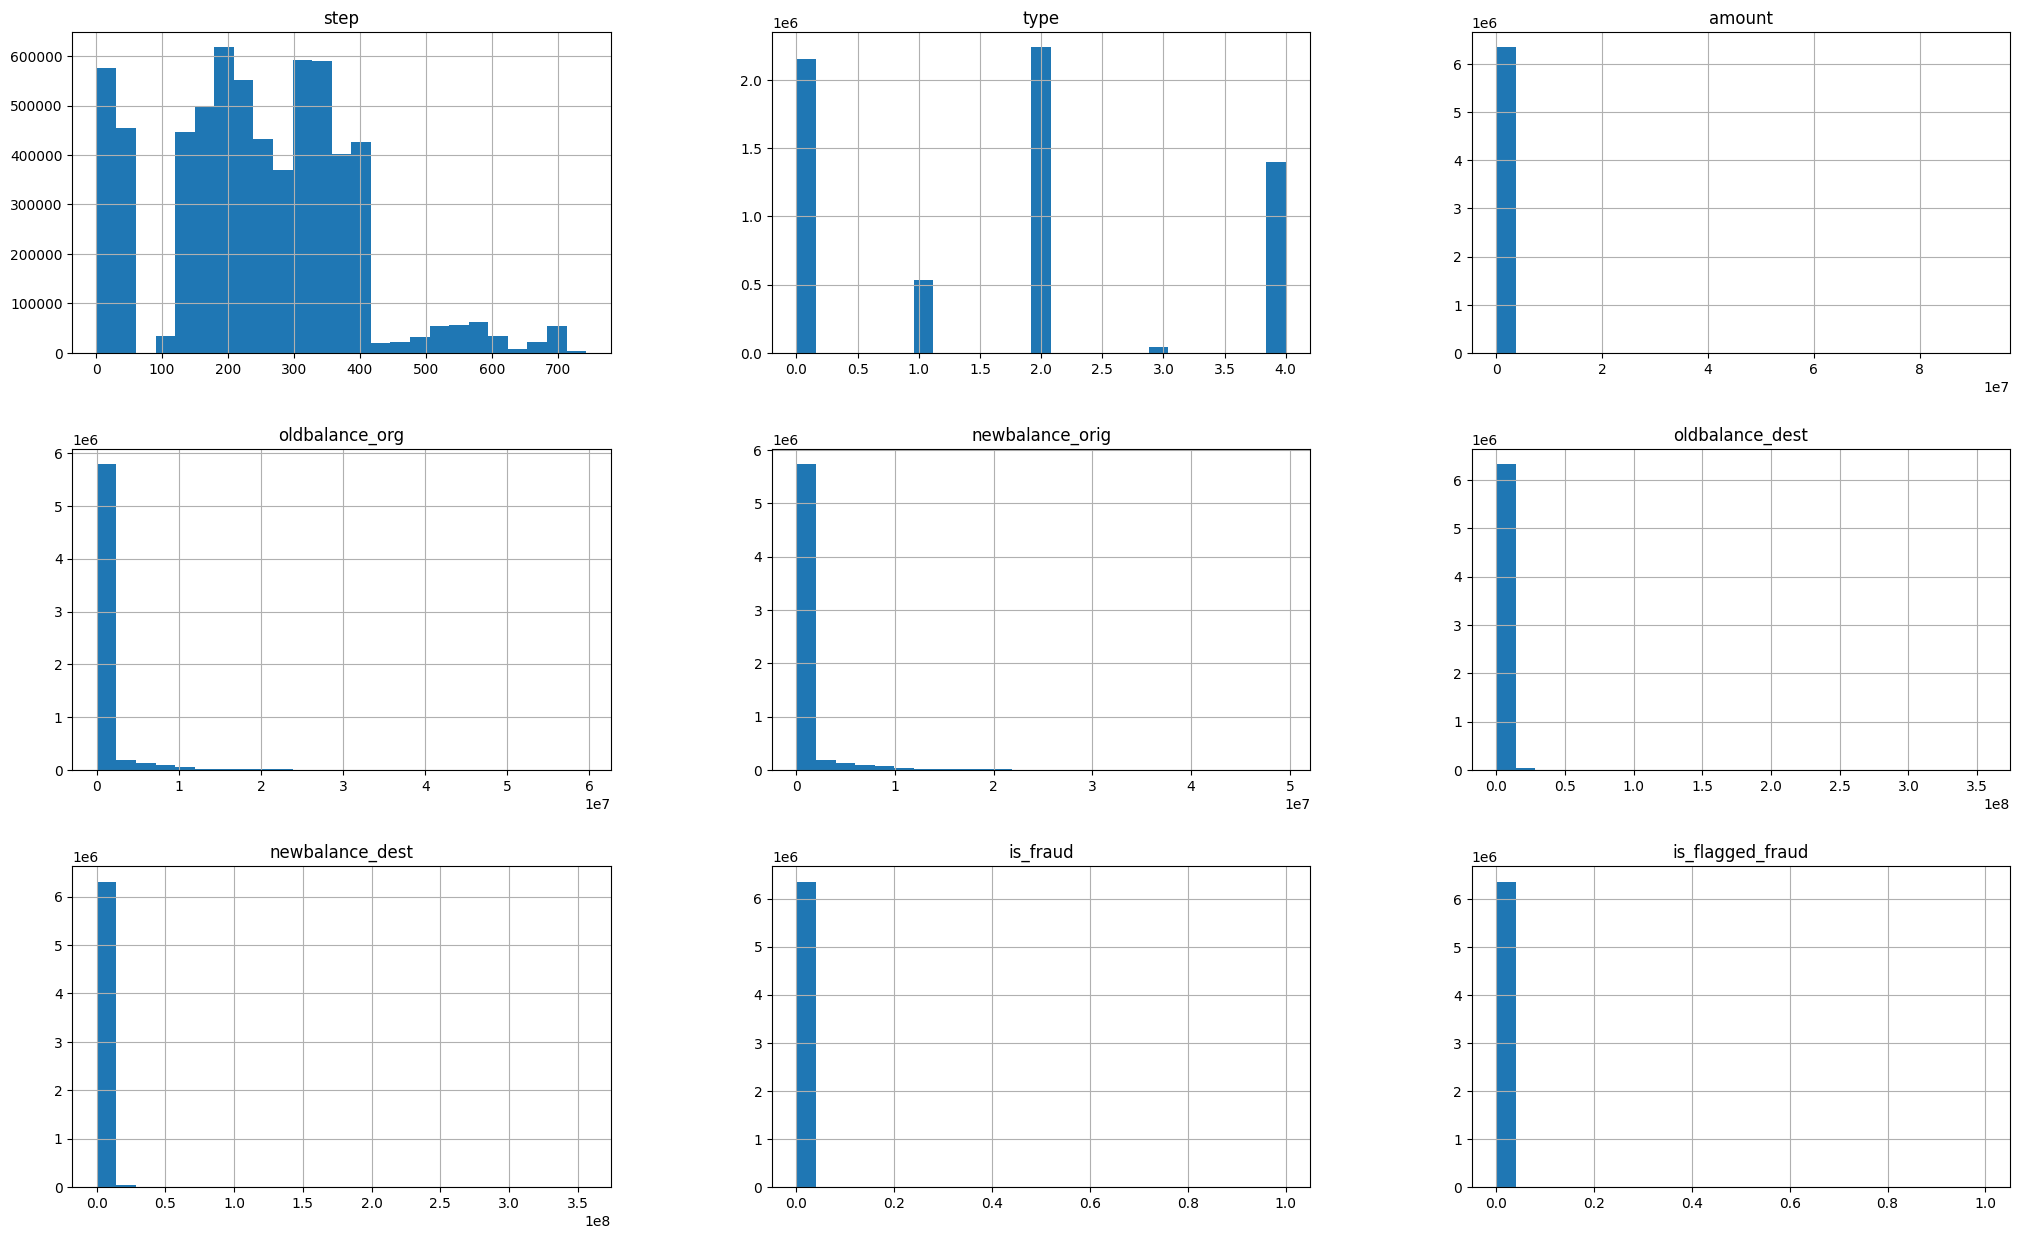

In [225]:
num_attributes.hist(bins=25, figsize=(25,15));

<Axes: xlabel='step', ylabel='Density'>

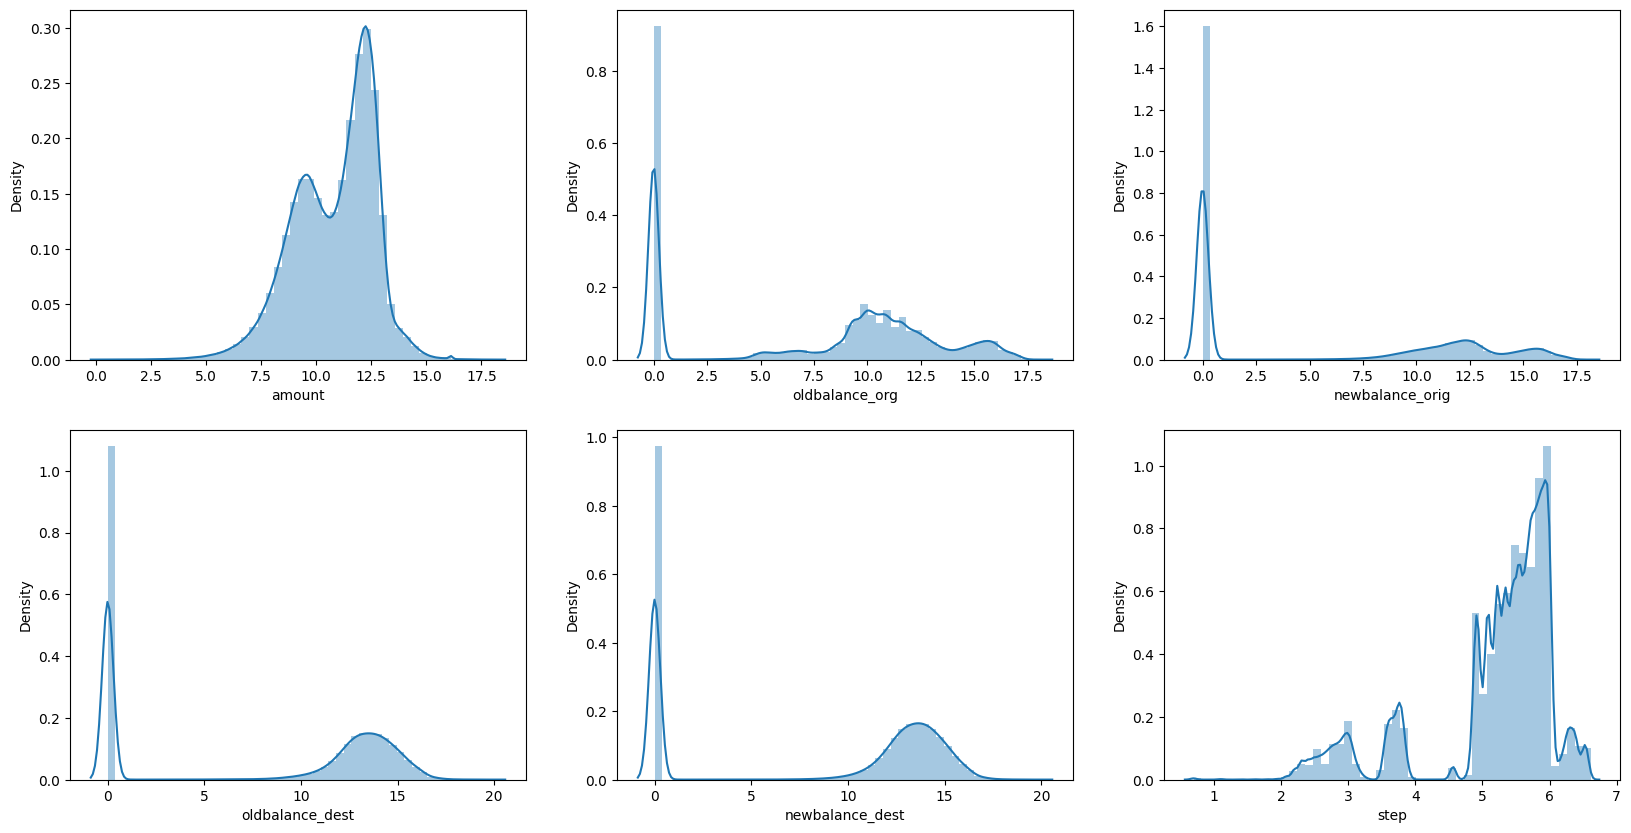

In [300]:
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
sns.distplot(np.log1p(num_attributes['amount']))  

plt.subplot(2,3,2)
sns.distplot(np.log1p(num_attributes['oldbalance_org']))

plt.subplot(2,3,3)
sns.distplot(np.log1p(num_attributes['newbalance_orig']))

plt.subplot(2,3,4)
sns.distplot(np.log1p(num_attributes['oldbalance_dest']))

plt.subplot(2,3,5)
sns.distplot(np.log1p(num_attributes['newbalance_dest']))

plt.subplot(2,3,6)
sns.distplot(np.log1p(data['step']))

# Analise Univariada

## is_fraud

# Analise Bivariada

# step

<Axes: xlabel='step', ylabel='amount'>

Error in callback <function _draw_all_if_interactive at 0x0000027D84A44040> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000027D84A60310> (for post_execute):



KeyboardInterrupt



# type

In [227]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'type', y = 'amount', data = data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000027D84A60310> (for post_execute):



KeyboardInterrupt



# amount

<Axes: xlabel='amount'>

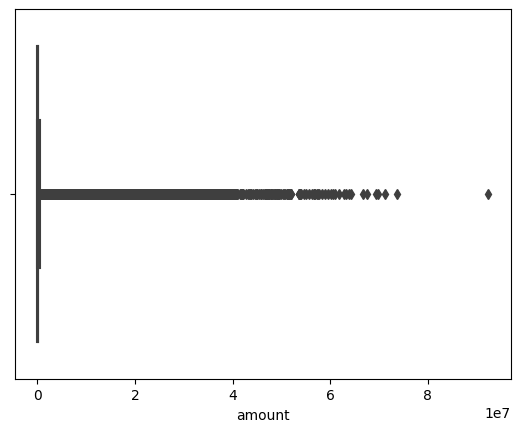

In [273]:
sns.boxplot(x=data['amount'])

In [298]:
data['amount'].value_counts()

amount
10,000,000.00    3207
10,000.00          88
5,000.00           79
15,000.00          68
500.00             65
                 ... 
8,513.48            1
189,137.90          1
1,615.78            1
128,891.19          1
12,257.89           1
Name: count, Length: 5316900, dtype: int64

In [283]:
data.shape[0]

6362620

In [284]:
data.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,0,"9,839.64",1231006815,"170,136.00","160,296.36",1979787155,0.00,0.00,0,0
1,1,0,"1,864.28",1666544295,"21,249.00","19,384.72",2044282225,0.00,0.00,0,0
2,1,1,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0
3,1,2,181.00,840083671,181.00,0.00,38997010,"21,182.00",0.00,1,0
4,1,0,"11,668.14",2048537720,"41,554.00","29,885.86",1230701703,0.00,0.00,0,0


In [294]:
data.loc[data['amount'] == '10,000,000.00']


,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud


In [296]:
data['amount'].max()

92445516.64

# name_orig

# oldbalance_org

# newbalance_orig

# name_dest

# oldbalance_dest

# newbalance_dest

# is_flagged_fraud

# Multivariated Analysis

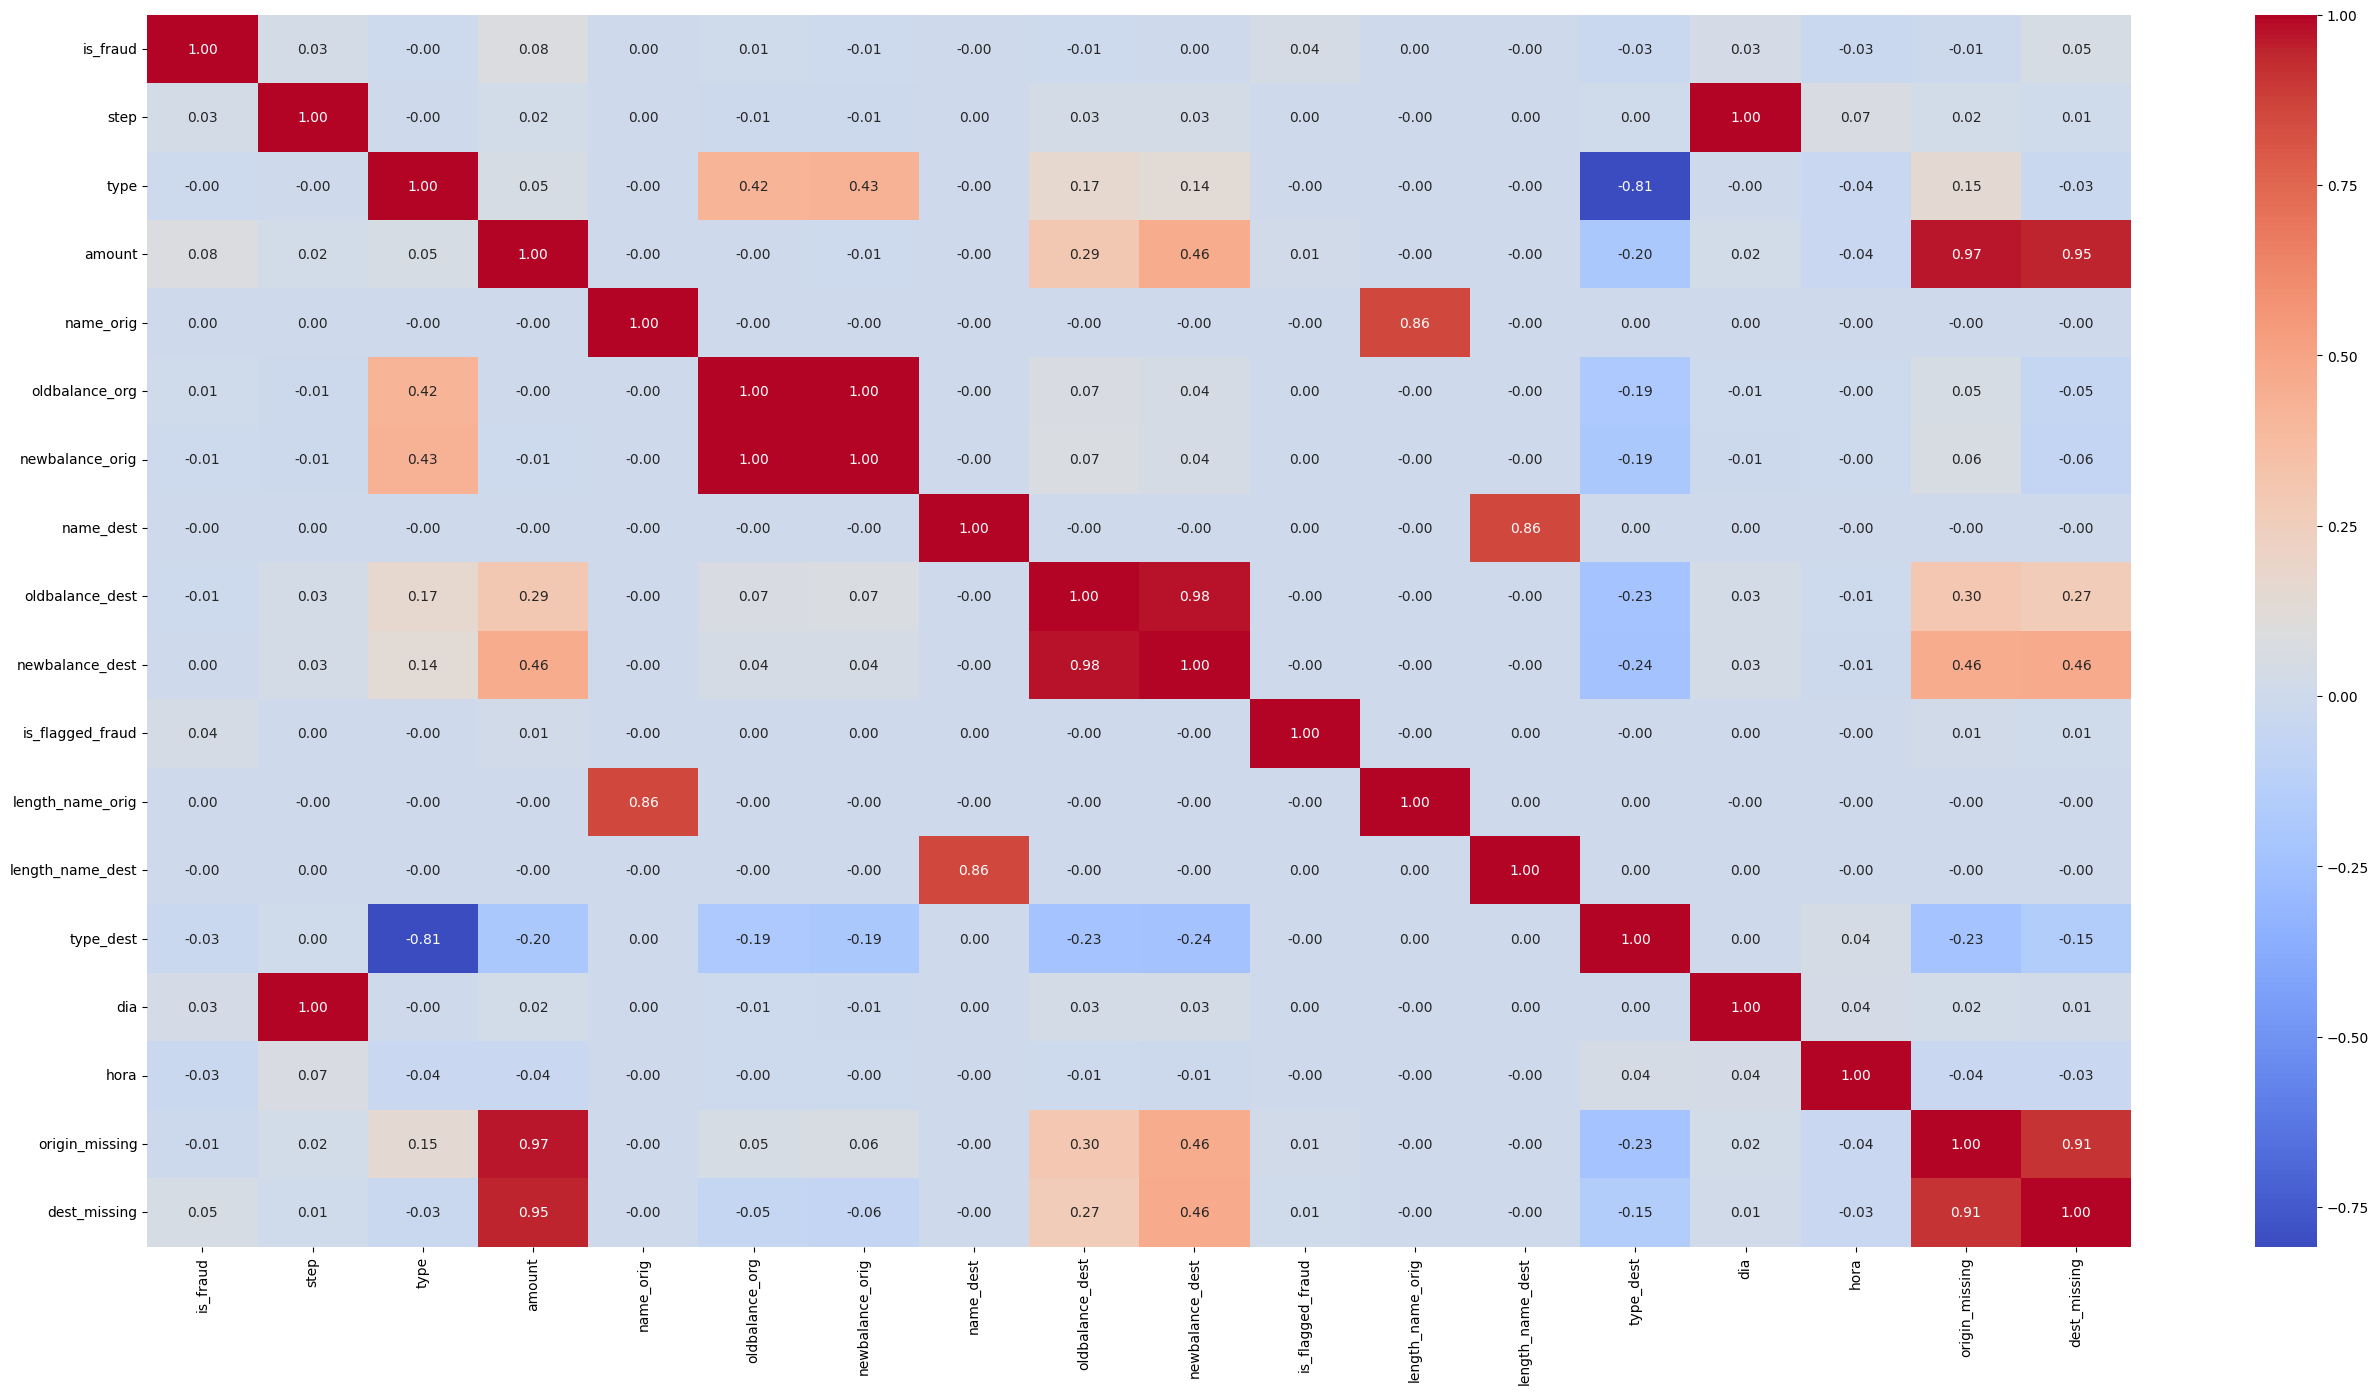

In [79]:
corr = data.corr(method='pearson')

column_order = ['is_fraud'] + [col for col in corr.columns if col != 'is_fraud']
corr = corr.reindex(columns=column_order, index=column_order)

plt.figure(figsize=(32, 16))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()